In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn
from bs4 import BeautifulSoup
from IPython.display import display
import seaborn as sns
import numpy as np
import scipy.stats.stats
pd.options.display.max_columns = None
incidents = pd.read_csv('incidents.csv')
observations = pd.read_csv('observations.csv')
obs_descriptions = pd.read_csv('observations_descriptions_clean.csv')
americas_projects = pd.read_csv('americas.csv')
acap = pd.read_csv('acap.csv')
apac = pd.read_csv('apac.csv')
corporate = pd.read_csv('corporate.csv')
cs = pd.read_csv('cs.csv')
emia = pd.read_csv('emia.csv')
gds = pd.read_csv('gds.csv')
global_aviation = pd.read_csv('global aviation.csv')
global_it = pd.read_csv('global it.csv')
ms = pd.read_csv('ms.csv')
synergy = pd.read_csv('synergy.csv')
#print(incidents.columns)
#print(observations.columns)
#print(obs_descriptions.columns)


In [57]:
#observations

In [54]:
all_projects = pd.concat([acap, americas_projects, apac, corporate, cs, emia, gds, global_aviation, global_it, ms, synergy], ignore_index=True)
#all_projects

In [55]:
observations_relevant = observations[['Id', 'Internal Action', 'Opened', 'Closed', 'Worker Type Observed','Hazard Type', 'Red Card Authority Used', 'Immediate Cause', 'Underlying Cause', 'Risk Level', 'Business Group', 'Strategic Business Unit', 'Site', 'Reported By Tracking ID (Masked)', 'Business Line', 'Created At', 'User Tracking ID (Masked)']]
#observations_relevant

In [56]:
#incidents

In [6]:
incidents_relevant = incidents[['Incident Number','Involved Employee Tracking ID (Masked)', 'Involved Employee Title', 'Business Group', 'Strategic Business Unit (SBU)', 'Project', 'End Market', 'Office or Field', 'Worker Type', 'Date of Incident', 'Time of Incident', 'Incident Type', 'Was This Incident Work Related?', 'Was a Vehicle Involved?', 'Was an employee or directly managed contractor injured?', 'Was a Non-Employee Unmanaged contractor or a 3rd party injured?', 'Was Property Damage Involved?', 'Potential Severity', 'Risk Assessment', 'Submitted by ID (Mask)', 'Submitted Date', 'Form Last Updated Date', 'OSHA Recordable', 'Report Status', 'Corrective Action Status', 'Closed', 'Closed By Date', 'Closed By Time', 'Incident Investigation (form to provide further details about the incident)', 'Country']]

In [7]:
observations_relevant = observations[['Id', 'Internal Action', 'Opened', 'Closed', 'Worker Type Observed','Hazard Type', 'Red Card Authority Used', 'Immediate Cause', 'Underlying Cause', 'Risk Level', 'Business Group', 'Strategic Business Unit', 'Area', 'Site', 'Reported By Tracking ID (Masked)', 'Business Line', 'Created At', 'User Tracking ID (Masked)']]
observations_relevant.set_index(observations_relevant['Id'], inplace=True)
people_card = observations_relevant[observations_relevant['Immediate Cause'] == 'People']
red_card = observations_relevant[observations_relevant['Red Card Authority Used'] == 1]
yellow_card = observations_relevant[observations_relevant['Red Card Authority Used'] == 0]
yellow_risk = pd.value_counts(yellow_card['Risk Level'])
red_risk = pd.value_counts(red_card['Risk Level'])
red_risk
#red card authority is most commonly used at a moderate risk level. However, considering that moderate risk level is the second most
#common level in the observations dataset, this might make sense.

3 - Moderate         1249
4 - High              894
2 - Low               391
5 - Critical          283
1 - Good Practice      86
Name: Risk Level, dtype: int64

In [8]:
total_risk = pd.value_counts(observations_relevant['Risk Level'])
total_risk

1 - Good Practice    50303
3 - Moderate         36503
2 - Low              21842
4 - High             11586
5 - Critical          1377
Name: Risk Level, dtype: int64

In [9]:
risk_divide = red_risk / total_risk
risk_divide

1 - Good Practice    0.001710
2 - Low              0.017901
3 - Moderate         0.034216
4 - High             0.077162
5 - Critical         0.205519
Name: Risk Level, dtype: float64

In [10]:
red_card_used_total = pd.value_counts(observations_relevant['Red Card Authority Used'])
red_card_used_total #out of 121611 observations, red card authority was only used 2903 times. 

0    118708
1      2903
Name: Red Card Authority Used, dtype: int64

In [11]:
total_observations = len(observations_relevant)
total_observations

121611

In [12]:
red_causes = pd.value_counts(red_card['Immediate Cause'])
red_causes

People                1477
Procedures             865
Premises               353
Plant & Substances     208
Name: Immediate Cause, dtype: int64

In [13]:
worker_card = pd.value_counts(red_card['Worker Type Observed'])
worker_card
#chi^2 test

Contractor/SubContractor (Unmanaged)    1959
Contractor/SubContractor (Managed)       650
AECOM Employee                           250
Third Party/Public                        26
JV Partner                                17
Name: Worker Type Observed, dtype: int64

In [14]:
workers = pd.value_counts(observations_relevant['Worker Type Observed'])


In [15]:
worker_stuff = pd.crosstab(observations['Worker Type Observed'],observations['Red Card Authority Used'])
worker_stuff_stat = scipy.stats.chi2_contingency(worker_stuff)
worker_stuff_stat
#worker_stuff

(546.74128820344379,
 5.1877064718833377e-117,
 4,
 array([[  2.69837891e+04,   6.60210911e+02],
        [  3.04353402e+04,   7.44659825e+02],
        [  5.70130644e+04,   1.39493557e+03],
        [  8.29699780e+02,   2.03002197e+01],
        [  3.34710653e+03,   8.18934747e+01]]))

In [16]:
worker_divide = worker_card / workers
worker_divide

Contractor/SubContractor (Unmanaged)    0.033540
Contractor/SubContractor (Managed)      0.020847
AECOM Employee                          0.009044
Third Party/Public                      0.007582
JV Partner                              0.020000
Name: Worker Type Observed, dtype: float64

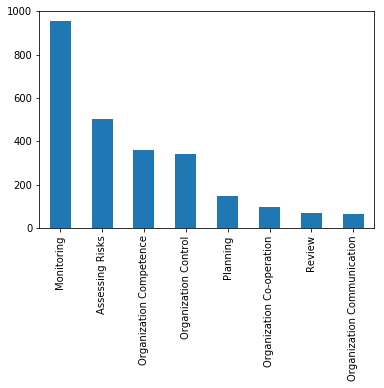

In [17]:
red_causes2 = pd.value_counts(red_card['Underlying Cause'])
red_causes2.plot(kind='bar')
plt.show()

In [53]:
red_hazards = pd.value_counts(red_card['Hazard Type'])
#red_hazards

In [52]:
yellow_hazards = pd.value_counts(yellow_card['Hazard Type'])
#yellow_hazards

In [51]:
hazard_table = pd.value_counts(observations_relevant['Hazard Type'])
#hazard_table

In [21]:
site = pd.value_counts(observations['Site'])


In [22]:
only_workers = observations['Worker Type Observed'].dropna()
print(len(only_workers))

121511


In [23]:
#little_merge = pd.merge(observations, all_projects, how='inner', on=['Site'])
#q =[]
#for i in range(len(observations)):
#    if observations['Site'][i] == all_projects

In [50]:
sorted_obs = observations.sort_values(by=['Area'])
sorted_proj = all_projects.sort_values(by=['Area'])
#sorted_obs

In [49]:
#sorted_proj

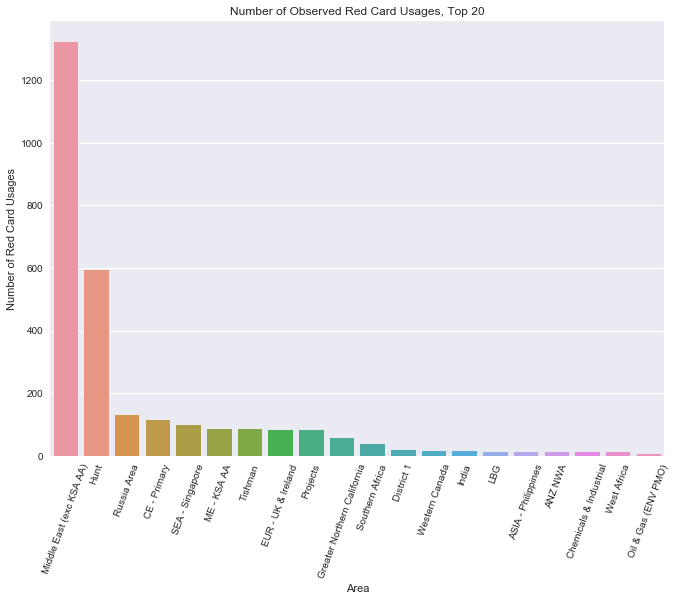

In [61]:
red_area = pd.value_counts(red_card['Area'])
red_area20 = red_area[:20,]
plt.xticks(rotation=70)
sns.barplot(red_area20.index, red_area20.values)
plt.title('Number of Observed Red Card Usages, Top 20')
plt.xlabel('Area')
plt.ylabel('Number of Red Card Usages')
plt.show()

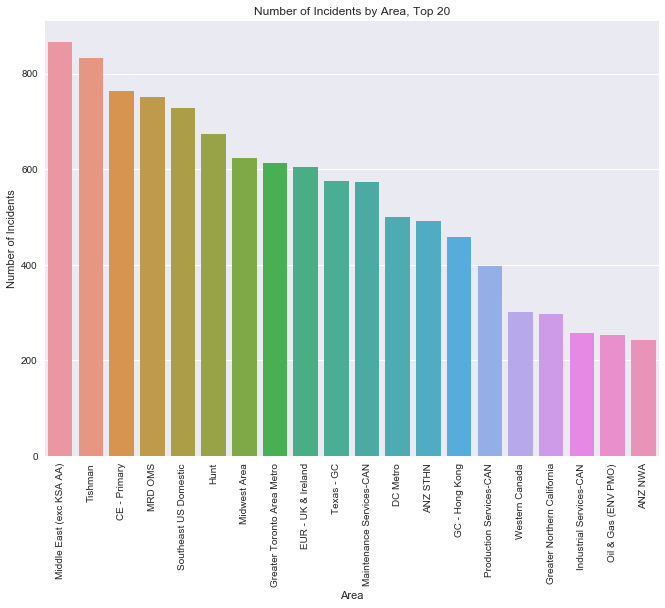

In [27]:
incident_areas = pd.value_counts(incidents['Area'])
incident_areas = incident_areas[:20,]
sns.set(rc={'figure.figsize':(11,8)})
plt.xticks(rotation='90')
ax = sns.barplot(incident_areas.index, incident_areas.values)
plt.title('Number of Incidents by Area, Top 20')
plt.xlabel('Area')
plt.ylabel('Number of Incidents')
plt.show()

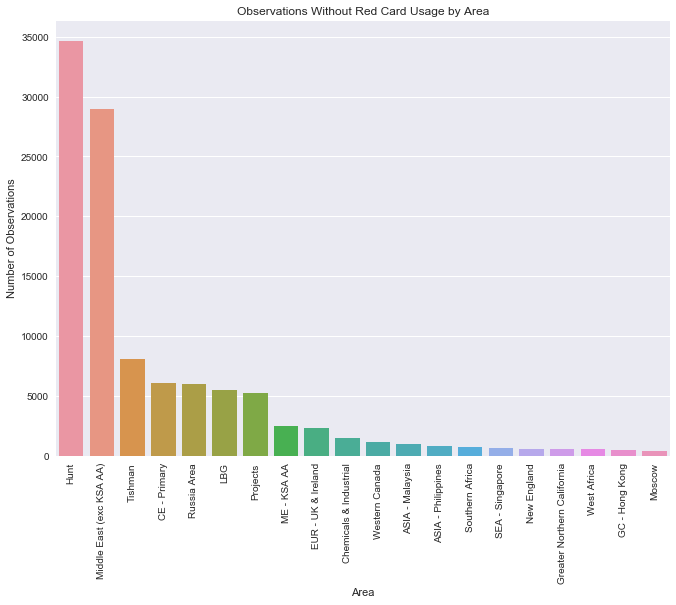

In [28]:
yellow_area = pd.value_counts(yellow_card['Area'])
yellow_area = yellow_area[:20,]
plt.xticks(rotation=90)
sns.barplot(yellow_area.index, yellow_area.values)
plt.title('Observations Without Red Card Usage by Area')
plt.xlabel('Area')
plt.ylabel('Number of Observations')
plt.show()

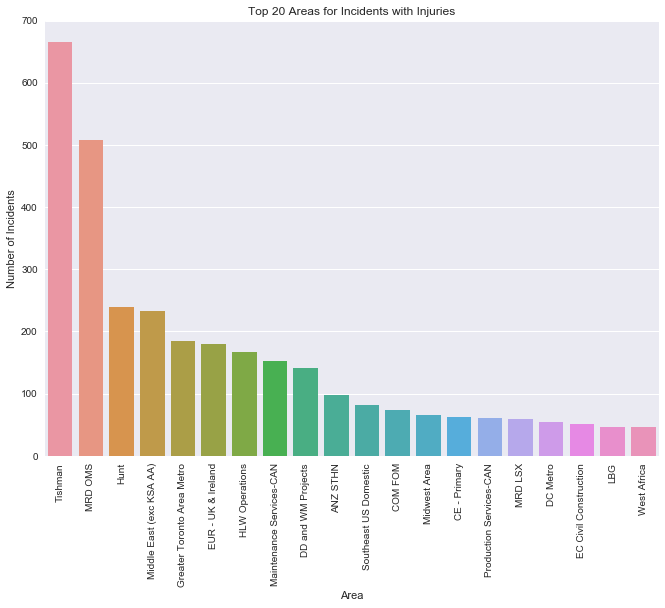

In [29]:
incidents_severe = incidents[np.logical_or(incidents['Was an employee or directly managed contractor injured?'] =='Yes',incidents['Was a Non-Employee Unmanaged contractor or a 3rd party injured?']== 'Yes')]
severe_areas = pd.value_counts(incidents_severe['Area'])
severe_areas20 = severe_areas[:20,]
plt.xticks(rotation=90)
sns.barplot(severe_areas20.index, severe_areas20.values)
plt.title('Top 20 Areas for Incidents with Injuries')
plt.xlabel('Area')
plt.ylabel('Number of Incidents')
plt.show()

In [48]:
red_area_sorted = red_area.sort_index()
severe_areas_sorted = severe_areas.sort_index()
for i in severe_areas_sorted.index:
    if i not in red_area_sorted.index:
        severe_areas_sorted.drop(i)
#severe_areas_sorted
#math = scipy.stats.stats.pearsonr(red_area[:20], y=severe_areas[:20])
#math

In [47]:
#red_area

In [45]:
#severe_areas

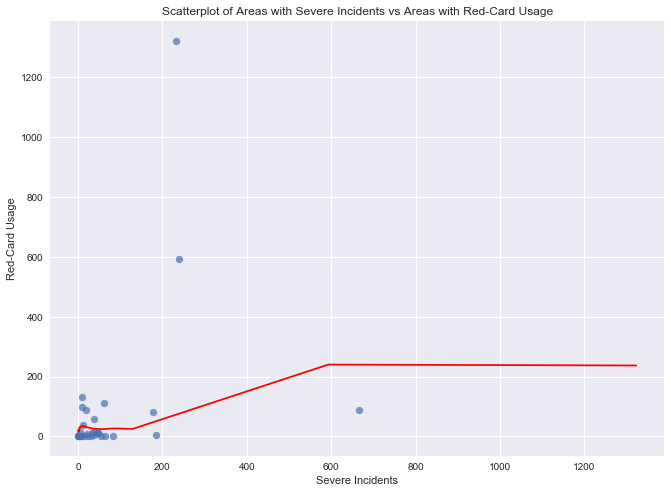

In [46]:
masterplan = pd.DataFrame({'Times Redcarded':red_area,'Severe Areas':severe_areas})
masterplan = masterplan.dropna()
plt.scatter(masterplan['Severe Areas'], masterplan['Times Redcarded'], alpha=.7)
#plt.yscale('log')
#plt.xscale('log')
plt.title('Scatterplot of Areas with Severe Incidents vs Areas with Red-Card Usage')
import statsmodels.nonparametric.smoothers_lowess as lowess
lowess1 = lowess.lowess(masterplan['Severe Areas'],  masterplan['Times Redcarded'], frac=.42)
plt.plot(lowess1[:,0], lowess1[:,1], color='red')
plt.xlabel('Severe Incidents')
plt.ylabel('Red-Card Usage')
plt.show()
#masterplan

In [34]:
masterplan.corr(method='pearson')
chipotle = scipy.stats.stats.pearsonr(masterplan['Times Redcarded'], masterplan['Severe Areas'])
chipotle #approaching significance

(0.35398718640490773, 0.050735713771839226)

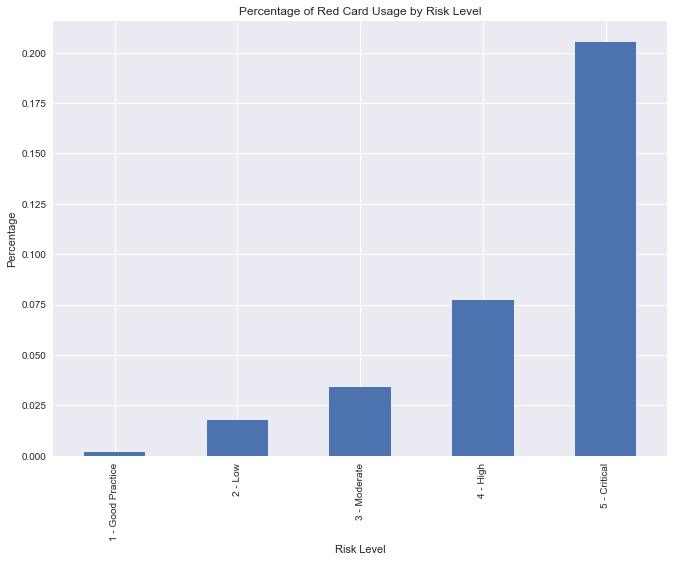

In [35]:
plot_name = risk_divide.plot(kind='bar')
plt.xlabel('Risk Level')
plt.ylabel('Percentage')
plt.title('Percentage of Red Card Usage by Risk Level')
plt.show()

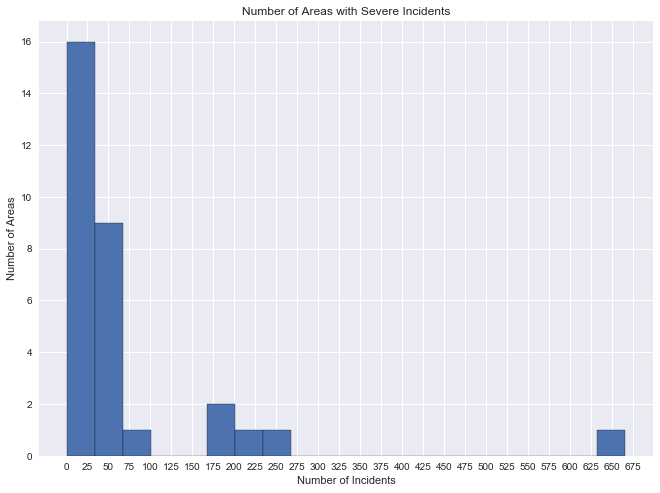

In [42]:
severe_areas_hist = plt.hist(masterplan['Severe Areas'], bins = 20, histtype='bar', ec='black')
plt.xticks(np.arange(0,700,step=25))
plt.title('Number of Areas with Severe Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Number of Areas')
#plt.xscale('log')
#plt.yscale('log')
plt.show()

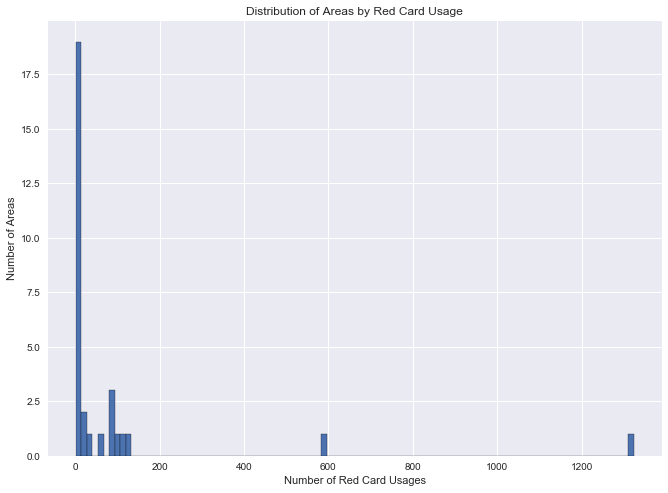

In [37]:
severe_areas_hist = plt.hist(masterplan['Times Redcarded'], bins = 100, histtype='bar', ec='black')
#plt.xticks(np.arange(0,700,step=25))
plt.title('Distribution of Areas by Red Card Usage')
plt.xlabel('Number of Red Card Usages')
plt.ylabel('Number of Areas')
plt.show()